##### load and combine all the data in different csv files

In [71]:
import pandas as pd

data = pd.read_csv('green_tripdata_2018-01.csv')
#data1 = pd.read_csv('green_tripdata_2018-02.csv')
#data2 = pd.read_csv('green_tripdata_2018-03.csv')
#data3 = pd.read_csv('green_tripdata_2018-04.csv')
#data4 = pd.read_csv('green_tripdata_2018-05 (1).csv')

In [72]:
data.shape

(793529, 19)

In [81]:
data4.shape

(797233, 19)

In [82]:
#merging two dataframes using outerjoin
data = pd.merge(data, data4,  how='outer')

In [83]:
data.shape

(3997935, 19)

In [85]:
#export to csv while avoiding adding index for exploratoty analysis with Tableau
data.to_csv('combinedJantoMay_data.csv', index=False)

In [ ]:
#data.append(data4, ignore_index=True) #can only be used for appending 2 dataframes

In [159]:
#reload combinedJantoMay_data.csv
#big choose if required
data = pd.read_csv('combinedJantoMay_data.csv')
data.shape #head, tail, etc

(3997935, 19)

In [160]:
#convert string to datetime for converting date and time to date only
data["lpep_pickup_datetime"] = pd.to_datetime(data["lpep_pickup_datetime"])
data["lpep_dropoff_datetime"] = pd.to_datetime(data["lpep_dropoff_datetime"])

In [161]:
#rename a column 'lpep_pickup_datetime' to 'pickup_date'
data.rename(columns = {'lpep_pickup_datetime':'pickup_date'}, inplace = True)
data.rename(columns = {'lpep_dropoff_datetime':'dropoff_date'}, inplace = True)

In [162]:
#convert the datetime into weekday_name, pickuphour,month 
#this will create more features for data to train on
data["pickup_dayofweek"] = data.pickup_date.dt.dayofweek
data["pickup_weekday"] = data.pickup_date.dt.weekday_name
#data["pickup_hour"] = data.pickup_date.dt.hour
data["pickup_month"] = data.pickup_date.dt.month

In [163]:
#converting date and time to date only
data['pickup_date'] = data['pickup_date'].dt.date
data['dropoff_date'] = data['dropoff_date'].dt.date

In [164]:
data.shape
#data.tail()

(3997935, 22)

In [ ]:
#### could add a step here to remove all the entries outside jan and May that are wrongly entered into the database.

In [165]:
import numpy as np
#data.clip(lower=0) #replaces all negatives with zeros

#convert all missing values to NaN
#data.replace('0', np.NaN)

In [ ]:
#check which are the columns in the dataset that has NaN
#data.loc[data['PULocationID'] == 'NaN']

In [14]:
#handle missing data by filling with the mean of the values in the column the dats belongs to
#from sklearn.preprocessing import Imputer #imputer takes care of missing data
# mean can be replaced with most_frequent or median, axis 0 for mean of column values
#imputer = Imputer(missingvalues='NaN', strategy ='mean', axis = 0) 
#imputer = imputer.fit(df[:, name of column with NaN])
#X[df[:, name of column with NaN or column numbers if together]] = imputer.transform(df[:, name of column with NaN])

In [ ]:
#scikitlearn removes the header of the columns and incase we need to reinstate the column headers.
#X_imputed can be any processed df
#X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

### grouping data

In [166]:
#group by pickup location, hour of day, month, day of month, weekday, day of week, and triptype and sum the passenger_count, trip_distance, fare_amount and tip_amount
f = {'passenger_count': 'sum', 'trip_distance': 'sum', 'fare_amount': 'sum', 'tip_amount': 'sum'}
working_data = data.groupby(['PULocationID', 'pickup_date', 'pickup_month','pickup_weekday', 'trip_type'], as_index=False).agg(f)

In [167]:
#working_data.head()
working_data.shape

(46724, 9)

In [168]:
##************do data cleanup before grouping
#group by pickup location, hour of day, month, day of month, weekday, day of week, and triptype and count the number of pick ups
pickup_data = data.groupby(['PULocationID', 'pickup_date','pickup_month','pickup_weekday', 'trip_type'], as_index=False).size().reset_index(name='pickupcounts')

In [169]:
pickup_data.shape

(46724, 6)

In [170]:
#since they both have the same index the pickupcounts column from the pickup_data dataframe can be added to the working data dataframe at the end
working_data['pickupcounts'] = pickup_data['pickupcounts']

In [171]:
working_data.head()
#working_data.shape

,PULocationID,pickup_date,pickup_month,pickup_weekday,trip_type,passenger_count,trip_distance,fare_amount,tip_amount,pickupcounts
0,1,2018-01-01,1,Monday,2.0,1,0.0,88.0,5.00,1
1,1,2018-01-02,1,Tuesday,1.0,1,15.7,61.5,18.82,1
2,1,2018-01-03,1,Wednesday,2.0,2,0.0,272.5,0.00,2
3,1,2018-01-07,1,Sunday,1.0,1,0.0,2.5,55.00,1
4,1,2018-01-08,1,Monday,2.0,6,0.0,143.0,15.60,2


In [172]:
#convert trip_type from 1 and 2 to dispatch and street_hail
working_data['trip_type'] = working_data['trip_type'].map({1.0: 'Street_hail', 2.0: 'Dispatch'})

In [213]:
working_data.tail()

,PULocationID,pickup_date,pickup_month,pickup_weekday,trip_type,passenger_count,trip_distance,fare_amount,tip_amount,pickupcounts
46719,265,2018-05-29,5,Tuesday,Street_hail,4,28.27,103.0,1.16,4
46720,265,2018-05-29,5,Tuesday,Dispatch,4,0.96,258.0,14.40,3
46721,265,2018-05-30,5,Wednesday,Street_hail,2,0.20,3.0,0.00,1
46722,265,2018-05-30,5,Wednesday,Dispatch,2,39.20,20.0,0.00,2
46723,265,2018-05-31,5,Thursday,Dispatch,2,0.20,81.0,13.00,2


In [174]:
#export csv while avoiding adding index while exporting to csv for exploratory analysis with Tableau
working_data.to_csv('working_data.csv', index=False)

In [176]:
#working_data.head()
working_data.shape

(46724, 10)

##### if needed also try with aggregating based on id/month/week/counts


In [211]:
##########goto tableau, open working_data and join with locationinfo also change the format of date such as 1/1/2018
####caution*** 
model_data = pd.read_csv('working_data.csv')

In [212]:
model_data.tail()
#model_data.shape

,PULocationID,pickup_date,pickup_month,pickup_weekday,trip_type,passenger_count,trip_distance,fare_amount,tip_amount,pickupcounts
46719,265,2018-05-29,5,Tuesday,Street_hail,4,28.27,103.0,1.16,4
46720,265,2018-05-29,5,Tuesday,Dispatch,4,0.96,258.0,14.40,3
46721,265,2018-05-30,5,Wednesday,Street_hail,2,0.20,3.0,0.00,1
46722,265,2018-05-30,5,Wednesday,Dispatch,2,39.20,20.0,0.00,2
46723,265,2018-05-31,5,Thursday,Dispatch,2,0.20,81.0,13.00,2


In [215]:
#convert string to datetime for converting date and time to date only
data["pickup_date"] = pd.to_datetime(data["pickup_date"])

In [216]:
model_data.tail()

,PULocationID,pickup_date,pickup_month,pickup_weekday,trip_type,passenger_count,trip_distance,fare_amount,tip_amount,pickupcounts
46719,265,2018-05-29,5,Tuesday,Street_hail,4,28.27,103.0,1.16,4
46720,265,2018-05-29,5,Tuesday,Dispatch,4,0.96,258.0,14.40,3
46721,265,2018-05-30,5,Wednesday,Street_hail,2,0.20,3.0,0.00,1
46722,265,2018-05-30,5,Wednesday,Dispatch,2,39.20,20.0,0.00,2
46723,265,2018-05-31,5,Thursday,Dispatch,2,0.20,81.0,13.00,2


In [222]:
############try using start='2017-12-31', end='2018-12-31' to fix the error due to single digits
###for detecting holidays
#remember to convert the date format using tableau meanwhile also join with location details
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start='2018-1-1', end='2018-5-31')

model_data['holiday'] = model_data['pickup_date'].isin(holidays)

In [225]:
#manually change federal holidays to true
model_data['holiday'] = np.where(model_data['pickup_date']=='2018-01-01', 'True', model_data['holiday'])

In [227]:
model_data['holiday'] = np.where(model_data['pickup_date']=='2018-01-15', 'True', model_data['holiday'])

In [228]:
model_data['holiday'] = np.where(model_data['pickup_date']=='2018-02-19', 'True', model_data['holiday'])

In [229]:
model_data['holiday'] = np.where(model_data['pickup_date']=='2018-05-28', 'True', model_data['holiday'])

In [230]:
model_data.head()

,PULocationID,pickup_date,pickup_month,pickup_weekday,trip_type,passenger_count,trip_distance,fare_amount,tip_amount,pickupcounts,holiday
0,1,2018-01-01,1,Monday,Dispatch,1,0.0,88.0,5.00,1,True
1,1,2018-01-02,1,Tuesday,Street_hail,1,15.7,61.5,18.82,1,False
2,1,2018-01-03,1,Wednesday,Dispatch,2,0.0,272.5,0.00,2,False
3,1,2018-01-07,1,Sunday,Street_hail,1,0.0,2.5,55.00,1,False
4,1,2018-01-08,1,Monday,Dispatch,6,0.0,143.0,15.60,2,False


In [232]:
model_data.to_csv('model_data.csv', index=False)

In [209]:
###open model_data 
#model_data = pd.read_csv('model_data.csv')

In [242]:
#model_data.tail()
model_data.shape

(46724, 11)

In [234]:
#merging two dataframes using innerjoin to join locationid details and the data
locationid_data = pd.read_csv('taxi _zone_lookup.csv')

In [237]:
locationid_data.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [244]:
#join locationid details and the model_data
model_data = pd.merge(model_data, locationid_data, left_on='PULocationID', right_on='LocationID')

In [246]:
#model_data.shape
model_data.head()

,PULocationID,pickup_date,pickup_month,pickup_weekday,trip_type,passenger_count,trip_distance,fare_amount,tip_amount,pickupcounts,holiday,LocationID,Borough,Zone,service_zone
0,1,2018-01-01,1,Monday,Dispatch,1,0.0,88.0,5.00,1,True,1,EWR,Newark Airport,EWR
1,1,2018-01-02,1,Tuesday,Street_hail,1,15.7,61.5,18.82,1,False,1,EWR,Newark Airport,EWR
2,1,2018-01-03,1,Wednesday,Dispatch,2,0.0,272.5,0.00,2,False,1,EWR,Newark Airport,EWR
3,1,2018-01-07,1,Sunday,Street_hail,1,0.0,2.5,55.00,1,False,1,EWR,Newark Airport,EWR
4,1,2018-01-08,1,Monday,Dispatch,6,0.0,143.0,15.60,2,False,1,EWR,Newark Airport,EWR


In [ ]:
###check whether number of rows changed after merge, it should not.
model_data.shape

In [247]:
#rearrange the columns in working_data
#working_data = working_data[['PULocationID', 'pickup_date','pickup_month','pickup_weekday']]
#remove the dispatch_triptype
f = {'pickupcounts':'sum'}
model_data = model_data.groupby(['PULocationID', 'pickup_date', 'pickup_month','pickup_weekday', 'holiday', 'Borough', 'Zone', 'service_zone'], as_index=False).agg(f)

In [249]:
model_data.tail()

,PULocationID,pickup_date,pickup_month,pickup_weekday,holiday,Borough,Zone,service_zone,pickupcounts
30636,263,2018-05-27,5,Sunday,False,Manhattan,Yorkville West,Yellow Zone,11
30637,263,2018-05-28,5,Monday,True,Manhattan,Yorkville West,Yellow Zone,11
30638,263,2018-05-29,5,Tuesday,False,Manhattan,Yorkville West,Yellow Zone,15
30639,263,2018-05-30,5,Wednesday,False,Manhattan,Yorkville West,Yellow Zone,22
30640,263,2018-05-31,5,Thursday,False,Manhattan,Yorkville West,Yellow Zone,18


In [250]:
#save the data as csv file
model_data.to_csv('model_data.csv', index=False)

In [135]:
#here the number of rows should change after groupby
#model_data.shape
model_data.tail()

,PULocationID,pickup_date,pickup_month,pickup_weekday,Holiday,pickupcounts
30939,265,2018-05-27,5,Sunday,False,2
30940,265,2018-05-28,5,Monday,False,3
30941,265,2018-05-29,5,Tuesday,False,7
30942,265,2018-05-30,5,Wednesday,False,3
30943,265,2018-05-31,5,Thursday,False,2


In [251]:
model_data['pickupcounts'].describe()

count    30641.000000
mean       130.299305
std        286.848304
min          1.000000
25%          6.000000
50%         24.000000
75%         84.000000
max       2261.000000
Name: pickupcounts, dtype: float64

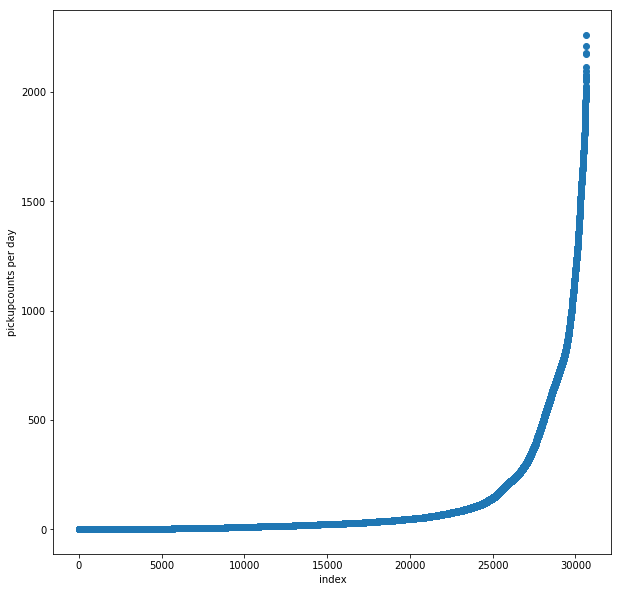

In [253]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(range(len(model_data["pickupcounts"])), np.sort(model_data["pickupcounts"]))
plt.xlabel('index')
plt.ylabel('pickupcounts per day')
plt.show()

In [254]:
model_data.head()

,PULocationID,pickup_date,pickup_month,pickup_weekday,holiday,Borough,Zone,service_zone,pickupcounts
0,1,2018-01-01,1,Monday,True,EWR,Newark Airport,EWR,1
1,1,2018-01-02,1,Tuesday,False,EWR,Newark Airport,EWR,1
2,1,2018-01-03,1,Wednesday,False,EWR,Newark Airport,EWR,2
3,1,2018-01-07,1,Sunday,False,EWR,Newark Airport,EWR,1
4,1,2018-01-08,1,Monday,False,EWR,Newark Airport,EWR,2


In [257]:
#removed rows for EWR and Unknown since they are not locations in NewYork and very low pickup counts
trunc_modeldata = model_data[~model_data.Borough.str.contains("EWR")]

In [259]:
trunc_modeldata = trunc_modeldata[~trunc_modeldata.Borough.str.contains("Unknown")]

In [260]:
trunc_modeldata.head()

,PULocationID,pickup_date,pickup_month,pickup_weekday,holiday,Borough,Zone,service_zone,pickupcounts
42,2,2018-05-23,5,Wednesday,False,Queens,Jamaica Bay,Boro Zone,1
43,3,2018-01-01,1,Monday,True,Bronx,Allerton/Pelham Gardens,Boro Zone,3
44,3,2018-01-02,1,Tuesday,False,Bronx,Allerton/Pelham Gardens,Boro Zone,13
45,3,2018-01-03,1,Wednesday,False,Bronx,Allerton/Pelham Gardens,Boro Zone,17
46,3,2018-01-04,1,Thursday,False,Bronx,Allerton/Pelham Gardens,Boro Zone,2


In [261]:
trunc_modeldata.shape

(30599, 9)

In [263]:
trunc_modeldata['pickupcounts'].describe()

count    30599.000000
mean       130.476355
std        287.005266
min          1.000000
25%          6.000000
50%         24.000000
75%         84.000000
max       2261.000000
Name: pickupcounts, dtype: float64

In [ ]:
#use it only if required
'''# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
#df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]

#keep only those have more than 50 pickups/day
#trunc_data = data[data['pickupcounts'] > 50] 

#drop rows with trip type column value Dispatch 
#trunc_data = data[~data.trip_type.str.contains('Dispatch')]
#remove location #s 1, 264, 265(unknowns),5,6,23,44,84,99,109,110,115,118,156,172,176,187,204,206,214,221,245,251(statenisland)
#df = df[df.line_race != 0]
#s = {1,264,265,5,6,23,44,84,99,109,110,115,118,156,172,176,187,204,206,214,221,245,251}

trunc_data = data[data.PULocationID != 1]


trunc_data = data[data['pickupcounts'] > 300]
trunc_data = trunc_data[trunc_data['pickupcounts'] < 2000]'''

In [ ]:
#only if required
# trunc_data.head()

In [264]:
trunc_modeldata.to_csv('trunc_modeldata.csv', index=False)

### dataprocessing of forecastdatajune2018